# Decision Trees
Decision Trees are a non-parametric supervised learning method used for classification and regression. The funtions used here are listed below along with their documentation:

- [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

In [54]:
from sklearn import tree, datasets
from sklearn.metrics import confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import graphviz
import numpy as np

## Classification
`DecisionTreeClassifier` is a class capable of performing multi-class classification on a dataset.

Two label classification using a toy data set

In [8]:
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict([[2., 2.]])

array([1])

Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:

In [6]:
clf.predict_proba([[2., 2.]])

array([[ 0.,  1.]])

### Multi-class classification on iris dataset
Fitting the tree and making predictions.

In [11]:
iris = datasets.load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
pred = clf.predict(iris.data)
cmat = confusion_matrix(iris.target, pred)
cmat

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:

In [53]:
# getting the probabilities of 5 random points in the dataset
np.random.seed(2017-12-29)
ind = [np.random.randint(150) for i in range(5)]
clf.predict_proba(iris.data[ind, :])

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.]])

### Plotting the tree
Below is an example graphviz export of the above tree trained on the entire iris dataset; the results are saved in an output file iris.pdf:

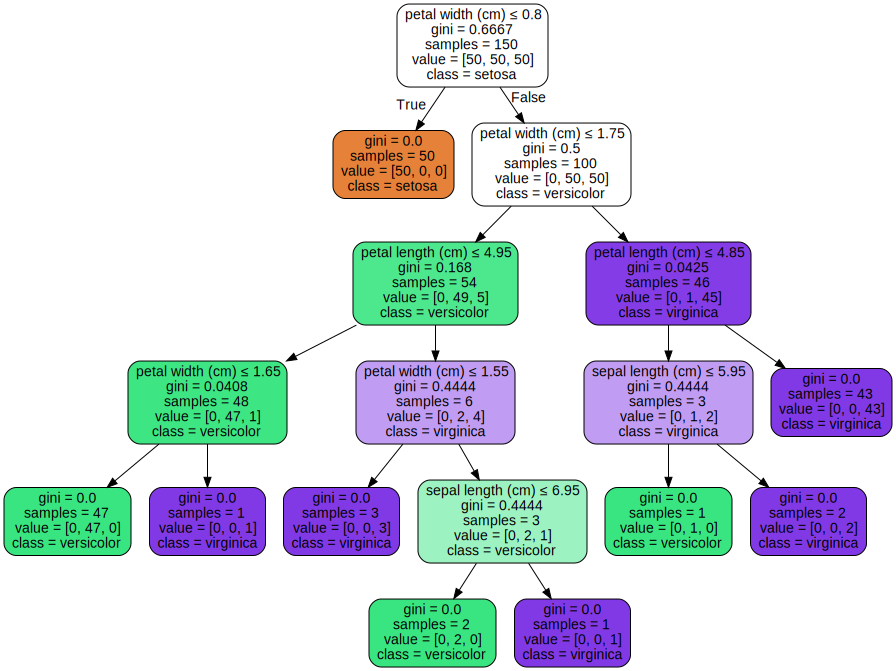

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, 
                                class_names=iris.target_names, filled=True, 
                                rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

## Regression

In [55]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [56]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

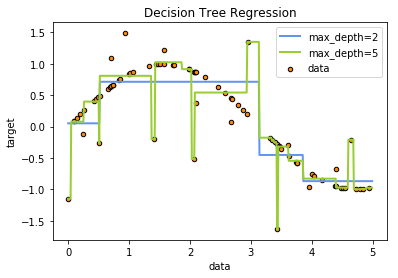

In [57]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Tips on practical use of decision trees
Check out [these tips](http://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use).